In [1]:
using Flux, Statistics, LinearAlgebra, Plots

In [2]:
model = Chain(x -> [x], Dense(1,40,tanh),Dense(40,1), x -> x[1])

Chain(
  var"#1#3"(),
  Dense(1, 40, tanh),                   # 80 parameters
  Dense(40, 1),                         # 41 parameters
  var"#2#4"(),
)                   # Total: 4 arrays, 121 parameters, 740 bytes.

In [3]:
ϵ = sqrt(eps(Float32))
function ODE()
    return sum(norm.(abs2.(((model(x+ϵ) - model(x))/ϵ) - (2*x + 1) for x in 0:0.002:1)))
end

ODE (generic function with 1 method)

In [4]:
function Bcs()
    return abs2(model(0.0) - 3.0)
end

Bcs (generic function with 1 method)

In [5]:
loss1() = ODE() + Bcs()

loss1 (generic function with 1 method)

In [6]:
ps1 = Flux.params(model)
opt1 = Flux.ADAM(0.01)
data1 = Iterators.repeated((),1500)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{}}}(Base.Iterators.Repeated{Tuple{}}(()), 1500)

In [7]:
function my_custom_train!(loss, ps, data, opt)
    local training_loss
    itr = 0
    for d in data
        gs = gradient(ps) do
            training_loss = loss()
            if (itr %50 == 0.0)
                print("Current Loss : ",training_loss,"\n")
            end
            return training_loss
        end
        Flux.Optimise.update!(opt, ps, gs)
        itr += 1;
    end
end

my_custom_train! (generic function with 1 method)

In [8]:
my_custom_train!(loss1, ps1, data1, opt1)

Current Loss : 1012.1116577663418
Current Loss : 137.13708000731174
Current Loss : 66.13775449308287
Current Loss : 9.37481925104835
Current Loss : 0.19763321803407652
Current Loss : 0.06367260910746056
Current Loss : 0.061495909885766996
Current Loss : 0.05944628754000848
Current Loss : 0.057559894306040166
Current Loss : 0.055852631447025756
Current Loss : 0.054329715412664584
Current Loss : 0.05298619800814994
Current Loss : 0.05181054197259946
Current Loss : 0.050786732886469885
Current Loss : 0.04989672699555948
Current Loss : 0.04912169480058288
Current Loss : 0.04844325127701921
Current Loss : 0.04784413710909688
Current Loss : 0.047308861727699755
Current Loss : 0.04682375644226925
Current Loss : 0.046377082532294334
Current Loss : 0.045959065529361555
Current Loss : 0.04556168406570443
Current Loss : 0.04517837220664712
Current Loss : 0.044804016519221126
Current Loss : 0.044434605967178145
Current Loss : 0.04406713350135013
Current Loss : 0.043699288001088424
Current Loss : 0

In [9]:
function analytic_solution(x)
    return x^2 + x + 3
end

analytic_solution (generic function with 1 method)

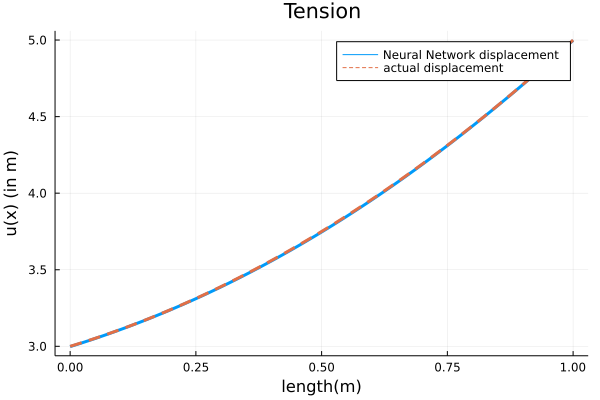

In [10]:
t1 = 0:0.0001:1
plot(t1,model.(t1),linewidth = 3, title = "Tension", label = "Neural Network displacement",xaxis="length(m)",yaxis="u(x) (in m)")
plot!(t1,analytic_solution.(t1),lw=3,ls=:dash,label = "actual displacement")